<a href="https://colab.research.google.com/github/adlerabf/Data_Science_Course_Projects/blob/main/Analisando_os_Dados_do_Airbnb_Florida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Florida*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Florida, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [56]:
# importar os pacotes necessarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/fl/broward-county/2021-12-23/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [6]:
# mostrar as 5 primeiras entradas
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,57818,Private house close to the beach!,275948,VonJon,NaN,Hollywood,26.01670,-80.12437,Entire home/apt,235,3,56,2021-10-22,0.51,1,337,15,NaN
1,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,NaN,Hallandale Beach,25.97641,-80.12052,Entire home/apt,140,30,2,2021-03-27,0.04,2,268,1,NaN
2,83449,MARY POP APTS 2/1 APT SLEEP 5,454736,"Jon, Mary Pop Apartments",NaN,Dania Beach,26.03392,-80.14201,Entire home/apt,99,7,20,2020-01-26,0.16,8,206,0,NaN
3,105411,House in the Ranches,532930,Sonia,NaN,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,4,5,2018-03-28,0.04,1,203,0,NaN
4,129061,MIAMI - LUXURY APARTMENT OVER BEACH,637272,Bianca,NaN,Hollywood,25.99332,-80.11887,Entire home/apt,315,14,18,2021-06-03,0.14,6,353,3,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [29]:
# identificar o volume de dados do DataFrame
df.shape

(12531, 18)

In [30]:
# verificar as 5 primeiras entradas do dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [72]:
# descrever as variáves númericas do dataset
df[['price', 'minimum_nights', 'number_of_reviews', 
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,12531.000000,12531.000000,12531.000000,10035.000000,12531.000000,12531.000000
mean,343.443301,5.770250,25.542415,1.565010,14.932009,206.378661
std,532.623267,17.955775,47.043784,1.592297,27.250530,120.599562
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,120.000000,1.000000,1.000000,0.460000,1.000000,90.000000
50%,201.000000,2.000000,8.000000,1.080000,4.000000,234.000000
75%,389.000000,4.000000,30.000000,2.210000,14.000000,318.000000
max,10929.000000,500.000000,611.000000,31.110000,152.000000,365.000000


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [34]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isna().sum() / df.shape[0]).sort_values(ascending=False))*100

neighbourhood_group               100.000000
license                            99.968079
reviews_per_month                  19.918602
last_review                        19.918602
host_name                           0.023941
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

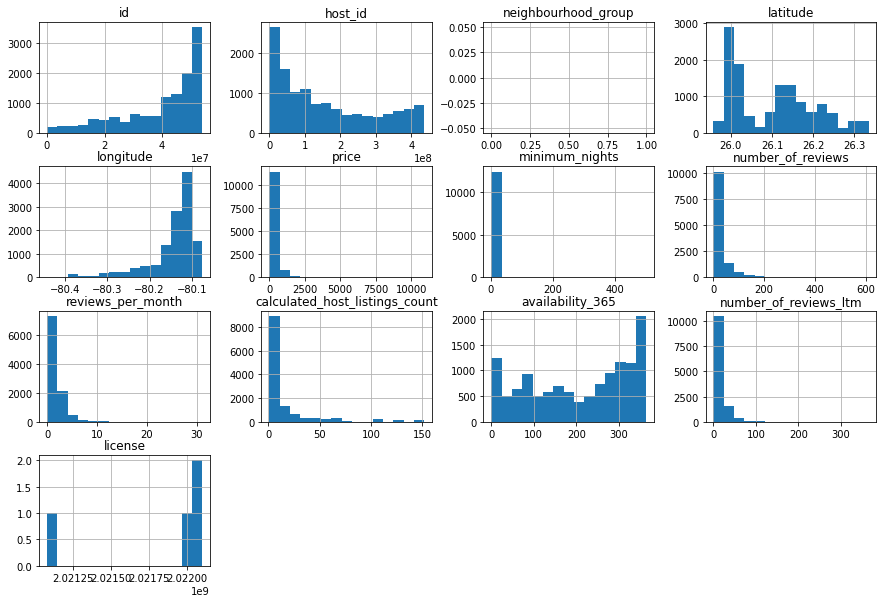

In [47]:
# plotar o histograma das variáveis numéricas
df.hist(bins= 15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [38]:
# ver a média da coluna `price``
df['price'].mean()

343.4433006144761

### **Q4. Qual a correlação existente entre as variáveis**

In [49]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.015437,-0.083696,-0.074826,0.084927,0.073140
minimum_nights,-0.015437,1.000000,-0.073025,-0.128949,-0.039046,0.046641
number_of_reviews,-0.083696,-0.073025,1.000000,0.544217,-0.083299,-0.044613
reviews_per_month,-0.074826,-0.128949,0.544217,1.000000,-0.084402,-0.038866
calculated_host_listings_count,0.084927,-0.039046,-0.083299,-0.084402,1.000000,0.040722
availability_365,0.073140,0.046641,-0.044613,-0.038866,0.040722,1.000000


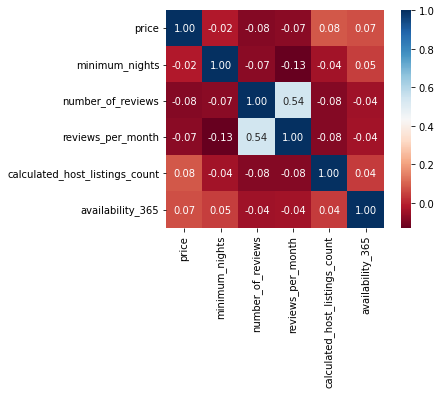

In [57]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [58]:
# mostrar a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts().sort_values(ascending=False)

Entire home/apt    10275
Private room        2052
Shared room          136
Hotel room            68
Name: room_type, dtype: int64

In [61]:
# mostrar a porcentagem de cada tipo de imóvel disponível
((df['room_type'].value_counts() / df['room_type'].shape[0]))*100

Entire home/apt    81.996648
Private room       16.375389
Shared room         1.085308
Hotel room          0.542654
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [69]:
# ver preços por bairros, na média
(df['price'].groupby(by=df['neighbourhood']).mean()).sort_values(ascending=False)

neighbourhood
Lighthouse Point            1057.727273
Southwest Ranches            470.470588
Hallandale Beach             426.255639
Lazy Lake                    402.571429
Lauderdale By The Sea        392.118380
Parkland                     389.266667
Fort Lauderdale              382.487706
Davie                        374.102564
County Regional Facility     372.111111
Hollywood                    371.151314
Plantation                   357.157303
Hillsboro Beach              328.166667
Wilton Manors                317.899687
Oakland Park                 309.314103
Cooper City                  297.370370
Pompano Beach                295.979062
Dania Beach                  280.552846
Deerfield Beach              263.278409
Unincorporated               248.352941
Sea Ranch Lakes              245.142857
Pembroke Pines               213.750000
Tribal Land                  204.500000
Miramar                      196.489879
Coral Springs                173.789474
Weston                    

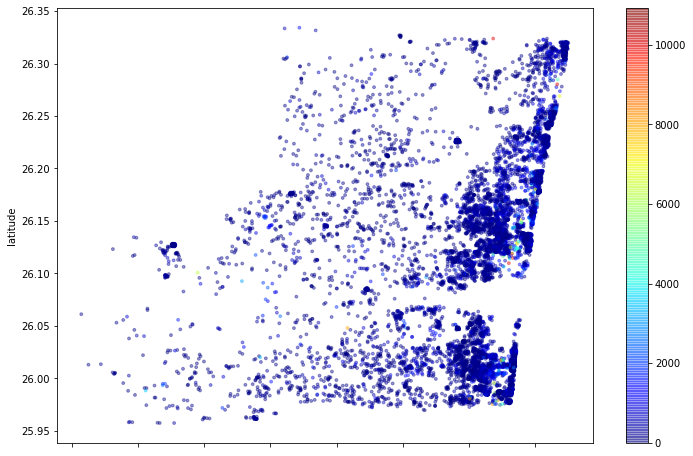

In [70]:
# plotar os imóveis pela latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [71]:
# ver a média da coluna `minimum_nights``
df['minimum_nights'].mean()

5.77024978054425

## Conclusões
Nesta analise que por hora é apenas exploratória, foi possível constatar alguns outlieres e grandes números de valores ausentes.

Na variável **price** verificamos que 75% dos resultados estão em USD 389.00, enquanto apresenta uma máxima de USD 10929.00, nos revelando um outlier. O mesmo se observa na variável **minimum_nights** onde o valor máximo de 500 se desprende da média e dos percentis. 

Observamos também um grande volume de valores ausentes em variáveis importantes como **reviews_per_month** e **last_review** que, somando seus percentuais, representam quase 40% do dataset. Não poderiamos simplesmente elimina-los, mas deverá ser aplicado algum método aleatório de preechimento desses valores. Já as variáveis **neighbourhood_group** e **license** podem ser elminadas devido baixo grau de importância na **host_name**, a exclusão de suas linhas não causaria impacto ao dataset.

